In [1]:
# Import project utils scripts
import os
import sys

src_path = os.path.join('../src/')

if src_path not in sys.path:
    sys.path.append(src_path)

from labelsUtils import (
    Label,
    labels_coordinates_from_files,
)

from regionUtils import (
    shapes_from_geojson,
    districts_labels_coordinates,
    vietnam_labels_coordinates,
    southern_labels_coordinates,
    highland_labels_coordinates,
    soils_labels_coordinates
)

from statisticsUtils import statistics
from config import *

/home/simon/miniconda3/envs/earthEngine/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
LABELS_COORDINATES = vietnam_labels_coordinates()

#  Coffee comparison to other entities

Il semble plus facile de distinguer le café des autres labels pendant la saison sèche. En effet, en regardant les différentes boîtes à moustache, on remarque qu'il est plus facile de différencer les labels avec les canaux _coastal aerosol_, _blue_, _green_, _red_ et _nir_ en saison sèche qu'en saison humide.

On remarque aussi que le café prend des valeurs proches du poivre, du thé et de l'eau. Toutefois, le café s'écarte un peu de poivre avec le canal _red_ et du thé et de l'eau avec le canal _nir_ même s'il reste encore un assez grand chevauchement entre leurs données.  

In [4]:
# NOTE: NATIVEVEGE is now named DENSE_FOREST in datasets
labels = [Label.COFFEE, Label.PEPPER, Label.NATIVEVEGE, Label.TEA, Label.URBAN, Label.WATER]
group_names = [label.name for label in labels]
rasters = [
    os.path.join(DATA_ROOT_PATH, path)
    for path in [
        'Vietnam_2016-2018_dry_season/merged.tif'
    ]
]

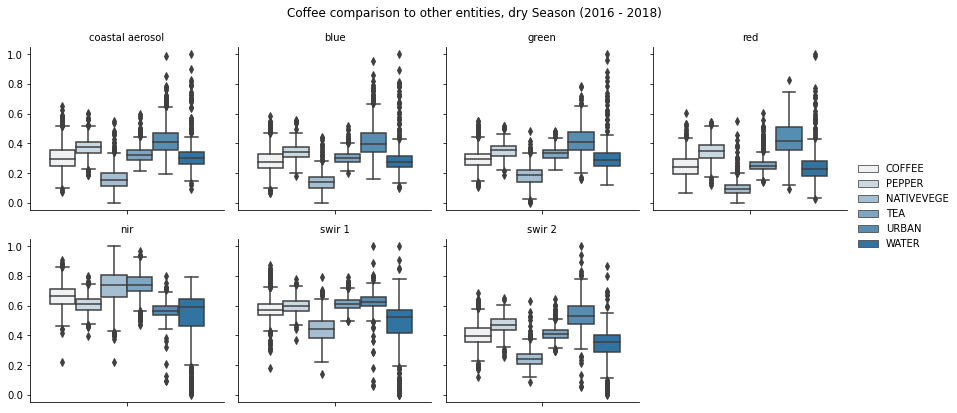

In [5]:
statistics(rasters, labels, group_names, [LABELS_COORDINATES], 'Coffee comparison to other entities, dry Season (2016 - 2018)')

In [6]:
rasters = [
    os.path.join(DATA_ROOT_PATH, path)
    for path in [
        'Vietnam_2016-2018_wet_season/merged.tif'
    ]
]

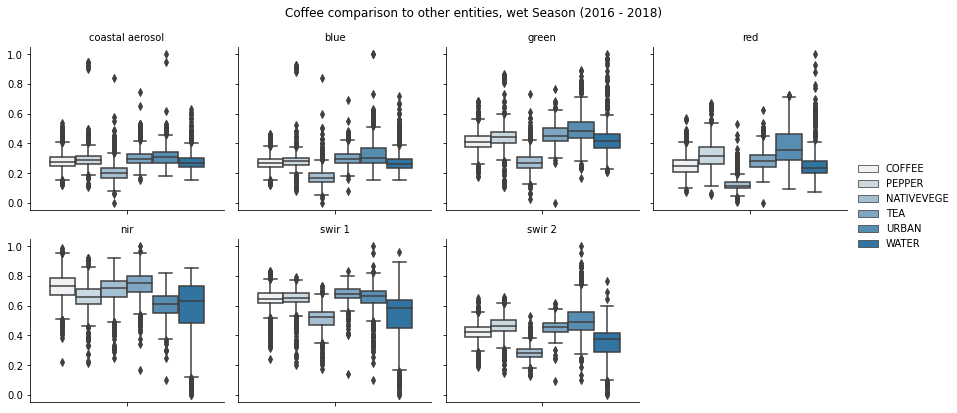

In [7]:
statistics(rasters, labels, group_names, [LABELS_COORDINATES], 'Coffee comparison to other entities, wet Season (2016 - 2018)')

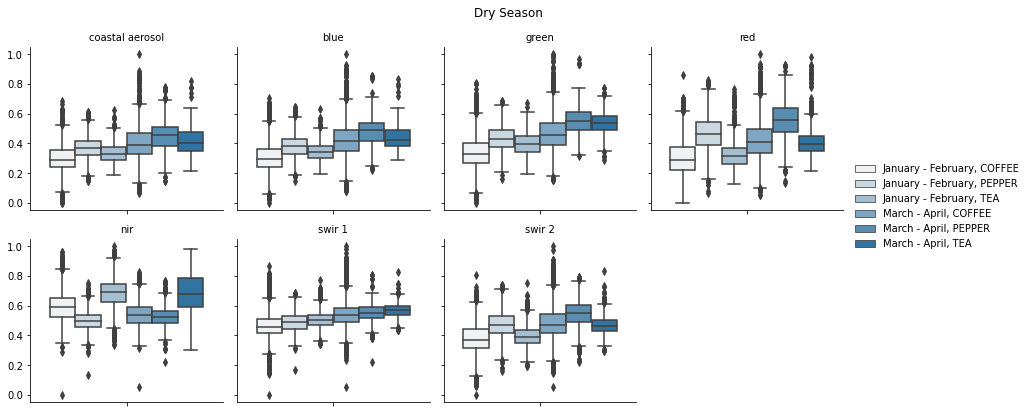

In [8]:
rasters = [
    os.path.join(DATA_ROOT_PATH, path)
    for path in  [
        'Vietnam_01_02/merged.tif',
        'Vietnam_03_04/merged.tif',  
    ]
]

labels = [Label.COFFEE, Label.PEPPER, Label.TEA]

group_names = [
    'January - February, COFFEE',
    'January - February, PEPPER',
    'January - February, TEA',
    'March - April, COFFEE',
    'March - April, PEPPER',
    'March - April, TEA',
]

statistics(rasters, labels, group_names, [LABELS_COORDINATES], 'Dry Season')

# Coffee comparison by season
Au Vietnam, il y a deux saisons : la saison sèche et la saison humide. La saison sèche commence en novembre et fini en avril. La saison humide, quant à elle, commence mai et fini en octobre [1].

Si l'on étudie la variabilité des données du café à travers ces deux saisons, on observe que la variabilité est tantôt meilleur en saison sèche et tantôt meilleure en saison humide.

Sur les années 2014 à 2016, la saison humide à moins de variabilité à part pour le canal _nir_ alors que pendant les années 2016 à 2018, la variabilité est plus faible en saison sèche pour tous les canaux sauf _red_, _swir1_, _swir2_, et _panchromatic_.

Pour ce qui est des valeurs médianes, on remarque une net augmentation du canal _nir_, de ~0.43 à ~0.65, en saison humide. Le canal _green_ augmente lui aussi, mais en 2016-2018 plus fortement, passant de ~0.35 à ~0.45 pour les années 2014 à 2016 et ~0.51 en 2016 à 2018.

Tous les canaux ont tendances à légèrement augmenter à part _red_, _panchromatic_ et _swir2_ qui baissent légèrement en saison humide.

[1] https://www.britannica.com/place/Vietnam/Climate, Climate of Vietnam, Britannica

In [9]:
rasters = [
    os.path.join(DATA_ROOT_PATH, path)
    for path in  [
        'Vietnam_2014-2016_dry_season/merged.tif',
        'Vietnam_2016-2018_dry_season/merged.tif',
        'Vietnam_2014-2016_wet_season/merged.tif',
        'Vietnam_2016-2018_wet_season/merged.tif'
    ]
]

group_names = [
    'Dry Season (2014 - 2016)',
    'Dry Season (2016 - 2018)',
    'Wet Season (2014 - 2016)',
    'Wet Season (2016 - 2018)'
]


 Dry Season (2014 - 2016) 
----------------
        coastal aerosol         blue        green          red          nir  \
count      4114.000000  4114.000000  4114.000000  4114.000000  4114.000000   
mean          0.388116     0.396344     0.365532     0.422664     0.425550   
std           0.101447     0.111773     0.116728     0.138610     0.072151   
min           0.000000     0.000000     0.010860     0.000000     0.002742   
25%           0.324561     0.327146     0.285068     0.329087     0.378248   
50%           0.377193     0.382831     0.352941     0.402383     0.425512   
75%           0.446272     0.464037     0.437104     0.504964     0.472190   
max           0.929825     0.948956     0.876018     1.000000     0.671759   

            swir 1       swir 2  
count  4114.000000  4114.000000  
mean      0.519723     0.441576  
std       0.090688     0.106360  
min       0.011706     0.031847  
25%       0.462793     0.372930  
50%       0.505853     0.427070  
75%       0.5

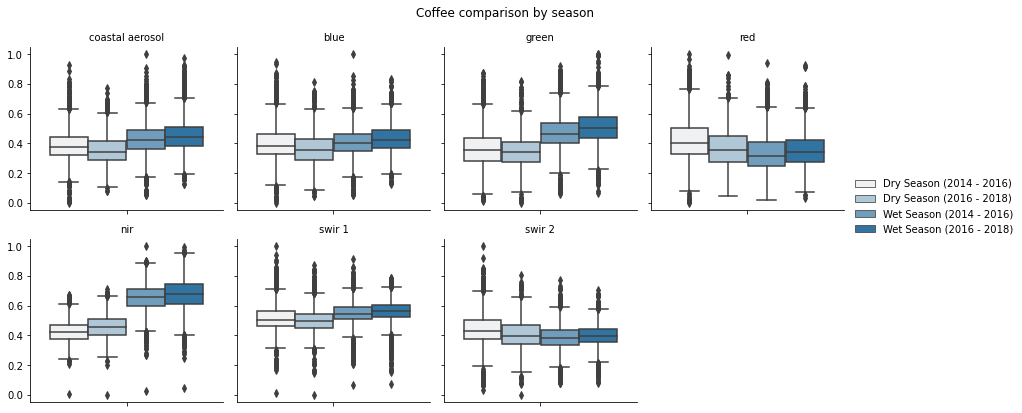

In [10]:
statistics(rasters, [Label.COFFEE], group_names, [LABELS_COORDINATES], 'Coffee comparison by season', True)

## Coffee comparison each two months (2014-2020)
Ici, on compare les valeurs des canaux du café deux mois par deux mois en prenant une médiane de toutes les données récoltées entre 2014 à 2020.

On remarque alors quelles sont les périodes qui ont le moins de variabilité et l'évolution des canaux à travers les mois.

### Contexte
Au Vietnam, la récolte du café commence en octobre [1] et prend fin de décembre à janvier [2], [3].

Après la récolte, les arbres à café sont taillés pour laisser plus lumière passer et c'est de janvier à avril où le caféier est fortement arrosé [2].

En février se déroule le Têt, la fête du nouvel an lunaire, et il est possible que la café soit volontairement abondamment arosé pour fleurir pendant Têt. 

[1] http://www.fao.org/3/ap301e/ap301e.pdf, "Diversification by smallholder farmers: Vietnam Robusta Coffee", AGSF, p.9

[2] ibid., p.19

[3] http://amarin.com.vn/coffee-harvest-season, "Harvest Season", AmaRin

### Évolution
C'est à partir de mai que le canal _nir_ augmente significativement, la médiane augmentant de 0.417 à 0.653.

En mars à avril, le canal rouge est au plus haut. En effet la médiane passe à 0.404 alors qu'elle était à 0.324 et qu'elle retombe ensuite à 0.333.

On observe aussi que _panchromatic_ augmente en mars à avril.

Le canal _green_, quant à lui, est à son plus haut en mai à juin et juillet à août.

### Variabilité
Voici les mois qui ont le moins de variabilité pour certains canaux :
- Septembre à octobre : coastal aerosol, blue, green, swir1, swir2, panchromatic
- Novembre à décembre : red 
- Mars à avril : _nir_

Septembre à octobre est la période avec la plus petite variabilité pour toutes les bandes de fréquences sauf _red_ et _nir_.

### Proportion de nuage moyenne
Cette proportion a été calculée à partir du script de téléchargement avec : 

```
merged_image_collections.aggregate_stats('CLOUD_COVER').getInfo()
```

- Janvier à février : 28.71%
- Mars à avril : 23.30%
- Mai à juin : 37.40%
- Juillet à août : 45.11%
- Septembre à octobre : 39.66%
- Novembre à décembre : 38.90%

In [11]:
rasters = [
    os.path.join(DATA_ROOT_PATH, path)
    for path in [
        'Vietnam_01_02/merged.tif',
        'Vietnam_03_04/merged.tif',
        'Vietnam_05_06/merged.tif',
        'Vietnam_07_08/merged.tif',
        'Vietnam_09_10/merged.tif',
        'Vietnam_11_12/merged.tif'
    ]
]

group_names = [
    'January - February',
    'March - April',
    'May - June', 
    'July - August',
    'September - October',
    'November - December'
]


 January - February 
----------------
        coastal aerosol         blue        green          red          nir  \
count      4114.000000  4114.000000  4114.000000  4114.000000  4114.000000   
mean          0.263595     0.325870     0.406636     0.331721     0.458164   
std           0.072295     0.082910     0.067680     0.080666     0.074463   
min           0.014401     0.050633     0.187394     0.122526     0.018229   
25%           0.216022     0.269961     0.360158     0.273684     0.409470   
50%           0.259226     0.318403     0.402082     0.324211     0.456690   
75%           0.311431     0.379747     0.447383     0.383895     0.503491   
max           0.590459     0.688413     0.709060     0.718737     0.733678   

            swir 1       swir 2  
count  4114.000000  4114.000000  
mean      0.516560     0.431599  
std       0.077021     0.085757  
min       0.090942     0.086197  
25%       0.469272     0.372298  
50%       0.506890     0.424335  
75%       0.555760 

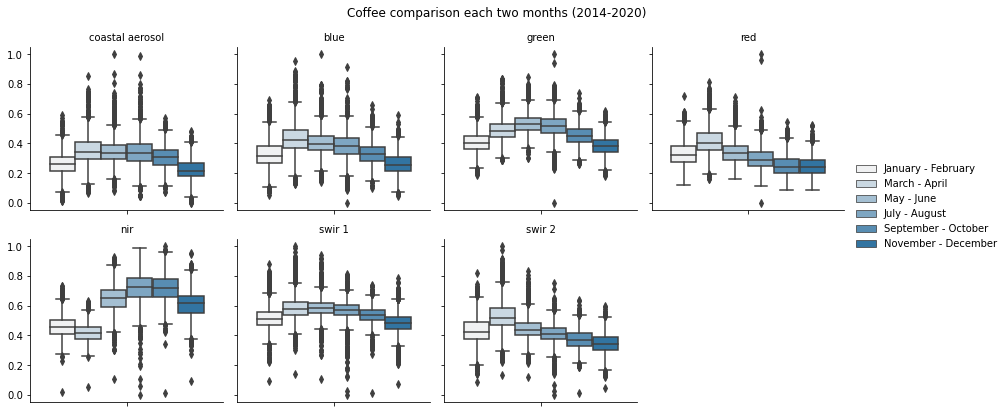

In [12]:
statistics(rasters, [Label.COFFEE], group_names, [LABELS_COORDINATES], 'Coffee comparison each two months (2014-2020)', True, True)

In [13]:
# NOTE: NATIVEVEGE is now named DENSE_FOREST in datasets
labels = [Label.COFFEE, Label.PEPPER, Label.NATIVEVEGE, Label.TEA, Label.URBAN, Label.WATER]

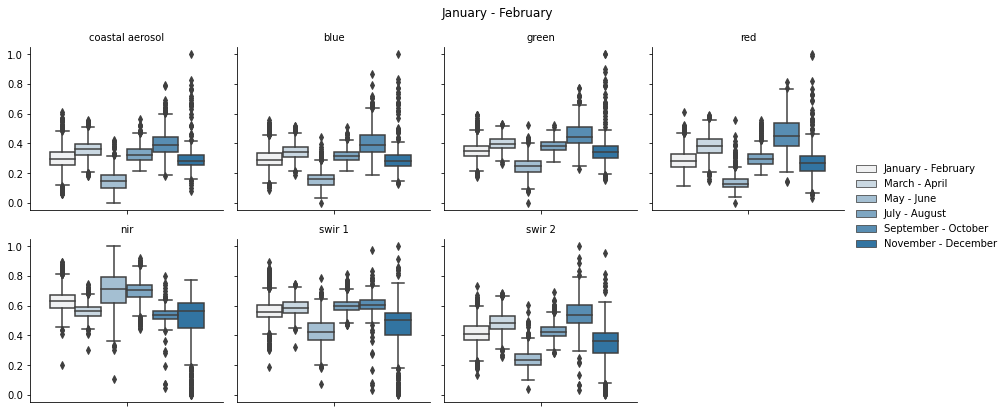

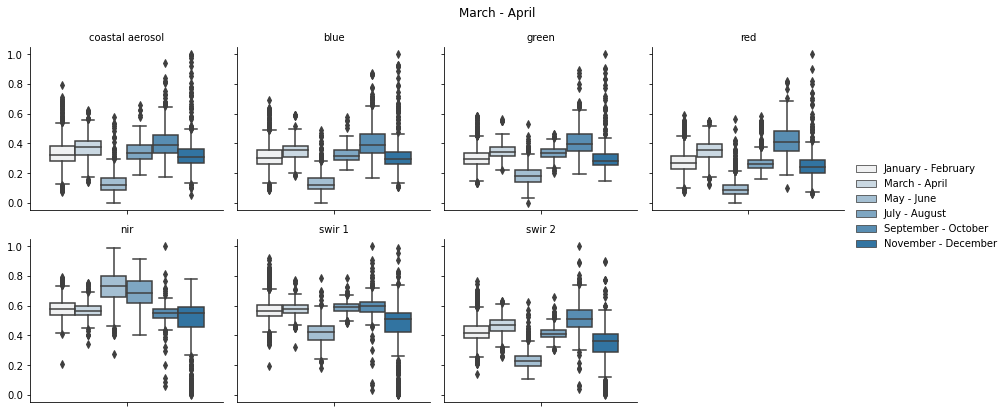

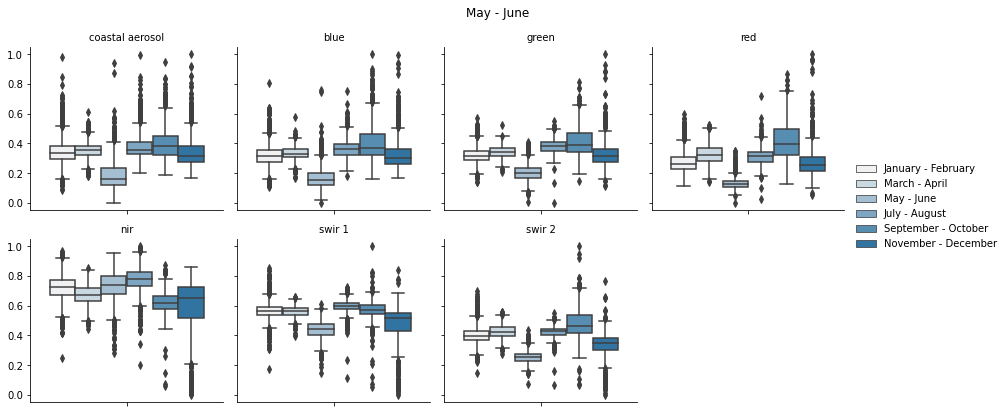

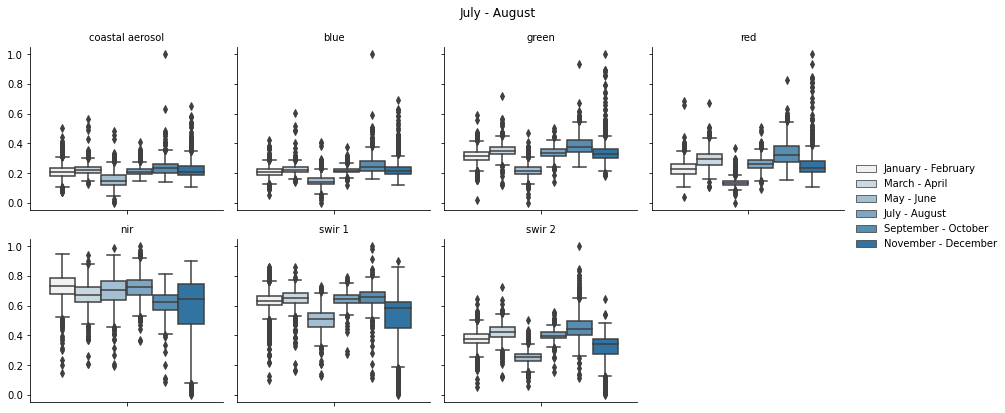

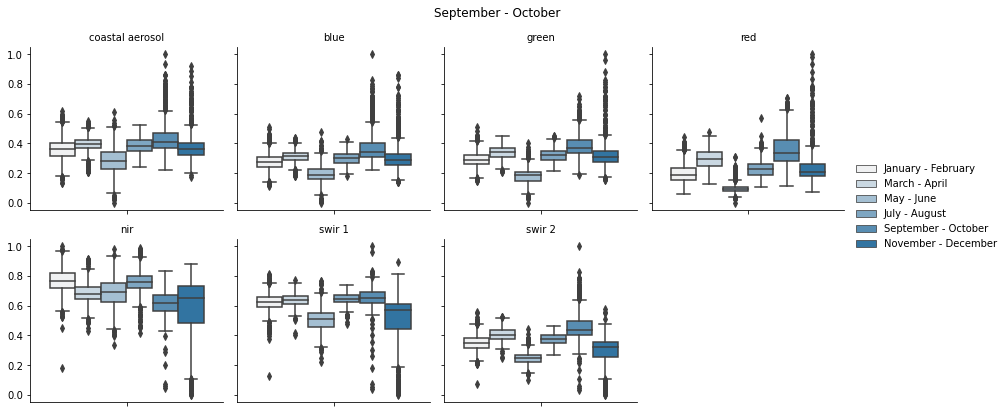

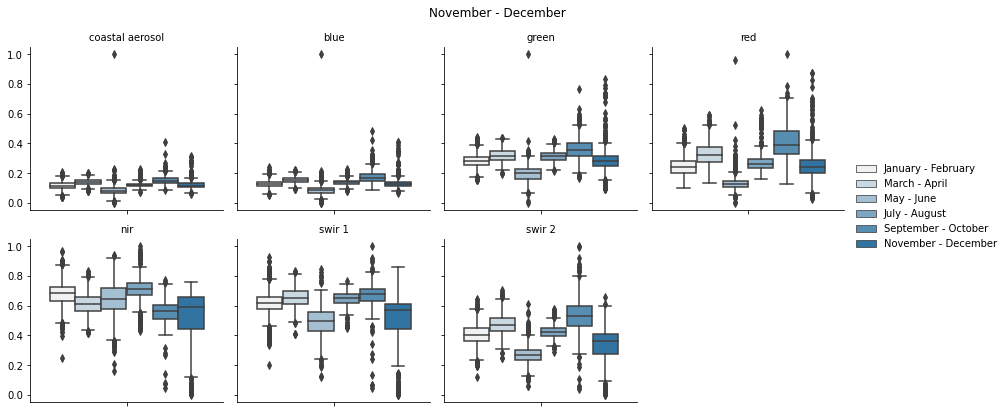

In [14]:
for i, raster in enumerate(rasters):
    statistics([raster], labels, group_names, [LABELS_COORDINATES], group_names[i])

# Coffee comparison by regions (2014-2020)

Il y a moins de variabilité dans la région _Highland_, même si la région _Southern_ à une plus petite variabilité pour les bandes de fréquences _coastal aerosol_ et _panchromatic_.

Dans ces deux régions, le café se dinstingue principalement par les canaux _panchromatic_, _red_, _coastal aeorosol_ et _blue_. Les différences de médianes étant de 0.092 pour _panchromatic_, 0.086 pour _red_, 0.081 pour _coastal aerosol_ et 0.07 pour _blue_.

In [15]:
SOUTHERN_LABELS_COORDINATES = southern_labels_coordinates()
HIGHLAND_LABELS_COORDINATES = highland_labels_coordinates()

In [16]:
labels_coordinates_list = [
    SOUTHERN_LABELS_COORDINATES,
    HIGHLAND_LABELS_COORDINATES
]

group_names = [
    'Southern Vietnam',
    'Highland Vietnam'
]

rasters = [
    os.path.join(DATA_ROOT_PATH, path)
    for path in [
        'Vietnam_2014_2020/merged.tif'
    ]
]


 Southern Vietnam 
----------------
        coastal aerosol         blue        green          red          nir  \
count      2709.000000  2709.000000  2709.000000  2709.000000  2709.000000   
mean          0.409350     0.412601     0.418830     0.372083     0.680212   
std           0.111188     0.127655     0.140800     0.147095     0.100812   
min           0.000000     0.000000     0.000000     0.000000     0.000000   
25%           0.341478     0.330179     0.320186     0.268065     0.610904   
50%           0.405213     0.401788     0.411446     0.355455     0.686955   
75%           0.475463     0.489485     0.502320     0.455086     0.752631   
max           0.849551     0.925868     1.000000     0.927742     1.000000   

            swir 1       swir 2  
count  2709.000000  2709.000000  
mean      0.593496     0.486007  
std       0.096915     0.112736  
min       0.000000     0.000000  
25%       0.531198     0.408701  
50%       0.579816     0.471814  
75%       0.644271   

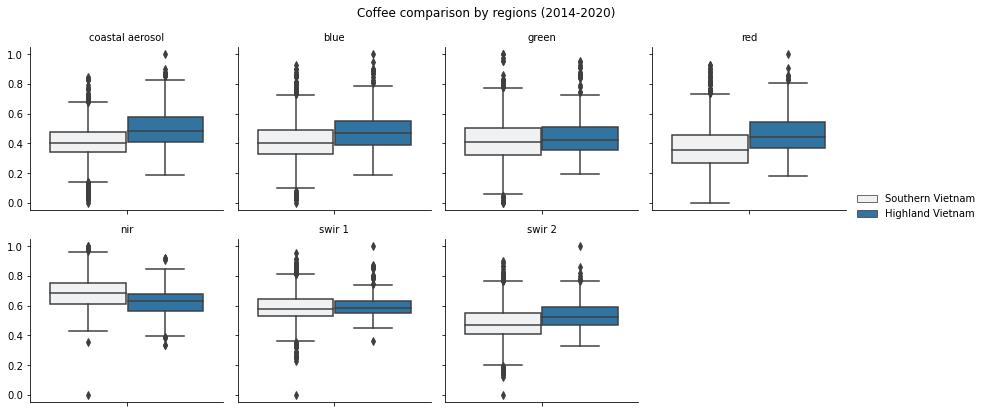

In [17]:
statistics(rasters, [Label.COFFEE], group_names, labels_coordinates_list, 'Coffee comparison by regions (2014-2020)', True, True)

# Coffee comparison by districts (2014 - 2020)

In [18]:
group_names = [
    'Gia Lai',
    'Dak Lak',
    'Dak Nong',
    'Lam Dong'
]

rasters = [
    os.path.join(DATA_ROOT_PATH, path)
    for path in [
        'Vietnam_2014_2020/merged.tif'
    ]
]

districts_coordinates = districts_labels_coordinates()

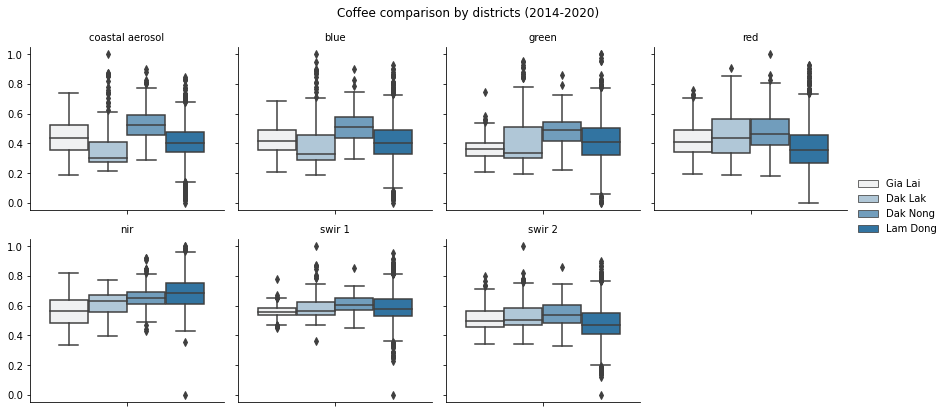

In [19]:
statistics(rasters, [Label.COFFEE], group_names, districts_coordinates, 'Coffee comparison by districts (2014-2020)')

# Coffee comparison by soil types (2014 - 2020)

In [20]:
SOILS_COORDINATES = soils_labels_coordinates()

In [21]:
group_names = [
    'Acric Ferrasols',
    'Ferric Acrisols',
    'Orthic Acrisols',
    'Rhodic Ferrasols',
    'Orthic Ferrasols'
]

rasters = [
    os.path.join(DATA_ROOT_PATH, path)
    for path in [
        'Vietnam_2014_2020/merged.tif'
    ]
]

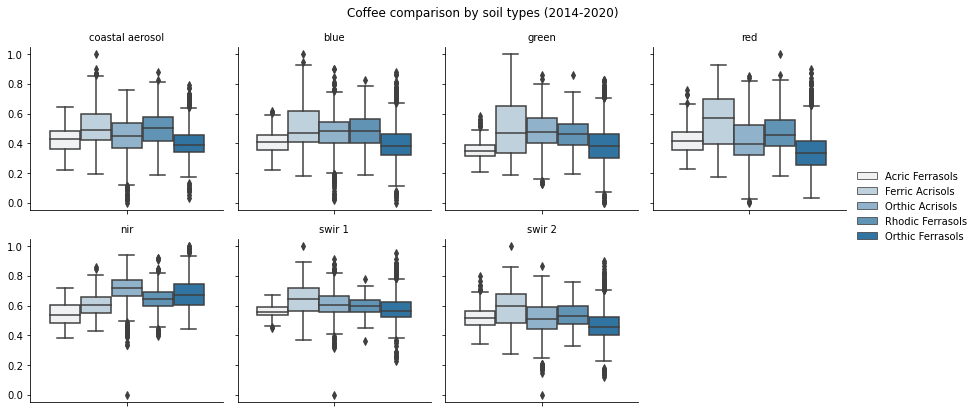

In [22]:
statistics(rasters, [Label.COFFEE], group_names, SOILS_COORDINATES, 'Coffee comparison by soil types (2014-2020)')